In [1]:
from sklearn import cluster
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from kneed import KneeLocator

# Adjacency Matrix

In [8]:
G = nx.Graph()
data = open("facebookNet.txt","r")
lines=data.readlines()
for line in lines:
    line_split=line.split(" ")
    G.add_edge(int(line_split[0]),int(line_split[1]))

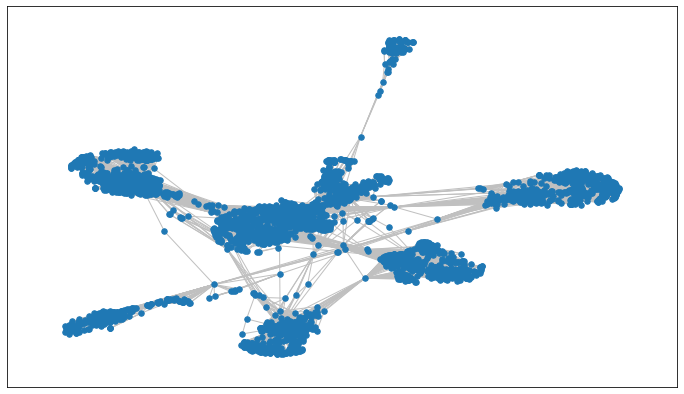

In [9]:
plt.figure(figsize=(12,7))
nx.draw_networkx(G,with_labels=False,node_size=30,edge_color='silver')

In [24]:
K =range(1, 20)

X=nx.to_numpy_array(G, nodelist=[i for i in range(4039)])
#we tried to execute elbow method 10 times to show and clarify that it is not stable in this case
for i in range(10):
    inertias=[]
    for k in K:
        # Building and fitting the model
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(X)
        inertias.append(kmeanModel.inertia_)

    kn = KneeLocator(K, inertias, curve='convex', direction='decreasing')
    print(kn.knee)

5
4
7
4
4
5
7
6
5
4


#centrality measures

In [30]:
table = pd.read_csv("Data/nodesByCentralityMeasures.csv")
trainingData = table[["DC","BC","CC","EC"]]
trainingData

,DC,BC,CC,EC
0,0.085934,1.463059e-01,0.353343,3.391796e-05
1,0.004210,2.783274e-06,0.261376,6.045346e-07
2,0.002476,7.595021e-08,0.261258,2.233461e-07
3,0.004210,1.685066e-06,0.261376,6.635648e-07
4,0.002476,1.840332e-07,0.261258,2.236416e-07
...,...,...,...,...
4034,0.000495,0.000000e+00,0.183989,2.951270e-10
4035,0.000248,0.000000e+00,0.183980,2.912901e-10
4036,0.000495,0.000000e+00,0.183989,2.931223e-10
4037,0.000991,7.156847e-08,0.184005,2.989233e-10


In [55]:
K = range(1, 20)
inertias=[]

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, n_init=200)
    kmeanModel.fit(trainingData)
    inertias.append(kmeanModel.inertia_)

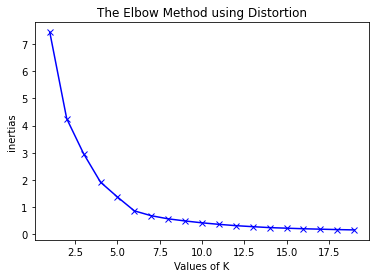

In [56]:
plt.plot(K,inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('inertias')
plt.title('The Elbow Method using Distortion')
plt.show()

In [57]:
from kneed import KneeLocator
kn = KneeLocator(K, inertias, curve='convex', direction='decreasing')
k=kn.knee
k

6

In [48]:
kmeanModel = KMeans(n_clusters=k)
kmeanModel.fit(trainingData)

KMeans(n_clusters=6)

In [49]:
Nodes = pd.DataFrame([i for i in G], columns = ['Node'])
Clusters = pd.DataFrame(kmeanModel.labels_, columns = ['Cluster'])
nodeByCluster = pd.concat([Nodes, Clusters], axis = 1)
nodeByCluster

,Node,Cluster
0,0,1
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
4034,4034,4
4035,4035,4
4036,4036,4
4037,4037,4


In [50]:
gk = nodeByCluster.groupby('Cluster')
gk.first()

,Node
Cluster,
0,1
1,0
2,2543
3,7
4,686
5,107


In [ ]:
community = []
for i in range(k):
    community.append(gk.get_group(i)['Node'].tolist())

In [58]:
import pickle
        
with open('networkShape.pkl', 'rb') as f:
    pos = pickle.load(f)

<function matplotlib.pyplot.show(close=None, block=None)>

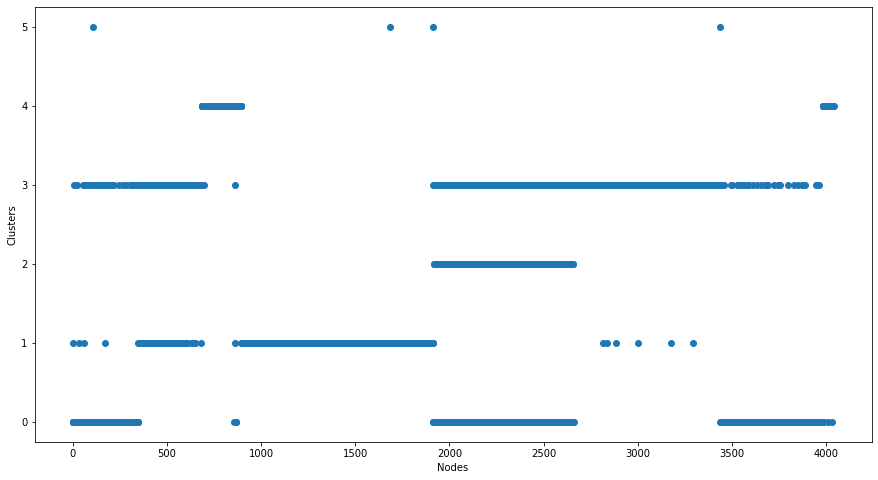

In [52]:
#Visualize Nodes by Clusters
plt.figure(figsize=(15,8))
plt.scatter(nodeByCluster['Node'], nodeByCluster['Cluster'])
plt.ylabel("Clusters")
plt.xlabel("Nodes")
plt.show

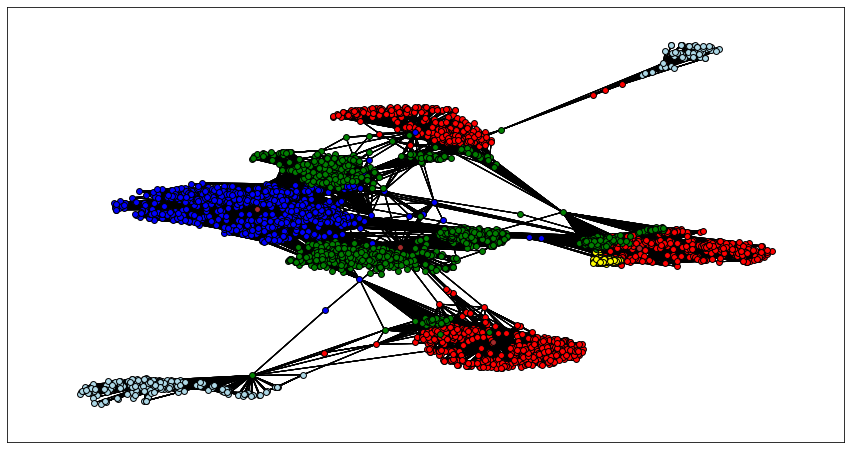

In [53]:
colors=['red','blue','yellow','green','lightblue','brown','grey','purple','pink','orange']
plt.figure(figsize=(15,8))
for i in range(k):
    nx.draw_networkx(G, pos=pos, nodelist=community[i], node_color= colors[i],with_labels=False,node_size=35, edgecolors='black')